fashion_mnist : 옷 이미지 분류하기
===============
<https://www.tensorflow.org/tutorials/keras/classification?hl=ko>

## 데이터셋 임포트

In [1]:
# 임포트

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# 경고 무시
import warnings
warnings.filterwarnings(action='ignore') 

# tensorflow 버전 확인
print(tf.__version__)

2.5.0


- 패션 mnist 데이터셋 임포트
- 훈련 : 60,000개, 평가 : 10,000개

In [2]:


fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# load_data() 호출로 데이터를 불러와서 NumPy 배열에 반환
# train : 모델 학습에 사용되는 훈련 세트
# test : 모델 테스트에 사용되는 테스트 세트

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_name = ['Tshirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','AnkleBoot']
# label : 0 ~ 9 정수배열
# 이미지를 출력할 때 별도의 클래스 이름을 별도의 변수로 만들어 저장

## 데이터 탐색하기
- 훈련 전 데이터셋의 구조 살펴보기


In [4]:
train_images.shape
# (60,000개의 이미지, 가로 28, 세로 28)
# 이미지 크기 : 28 * 28 픽셀
# 픽셀 값 : 0 ~ 255

(60000, 28, 28)

In [5]:
len(train_labels)
# 훈련 세트 label 개수

60000

In [6]:
train_labels
# labels 표시(0 ~ 9 정수)
# uint8 : 8비트의 부호 없는 정수형 배열

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape
# (10,000개의 이미지, 가로 28, 세로 28)

(10000, 28, 28)

In [8]:
len(test_labels)
# 테스트 세트 label 개수

10000

## 데이터 전처리

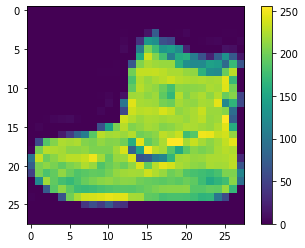

In [9]:
# colorbar를 이용하여 이미지 보기
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

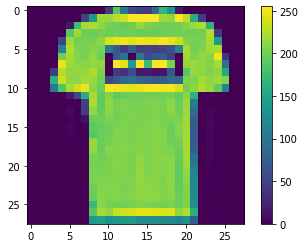

In [10]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()
# 픽셀 값 범위 0 ~ 255

In [11]:
# 픽셀 값 위 0 ~ 1로 조정
train_images = train_images / 255.0
test_images = test_images / 255.0

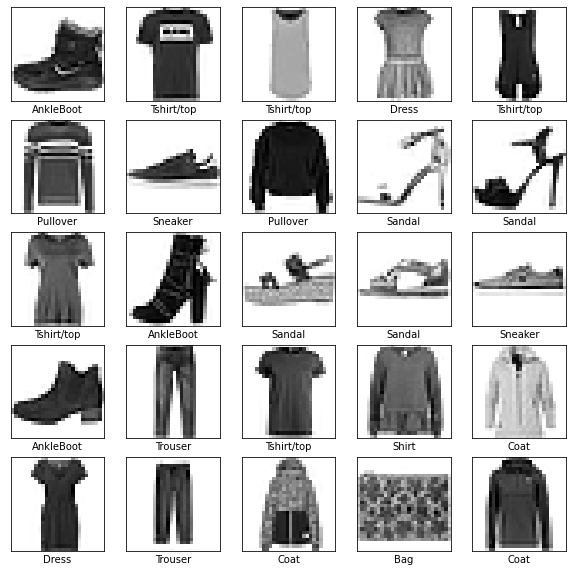

In [12]:
# 조정 후 이미지 25개와 클래스 이름 출력
# 데이터가 올바른지 확인
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_name[train_labels[i]])
plt.show()

## 신경망 모델 만들기
- 모델의 층을 구성한 다음 컴파일


In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4995 - accuracy: 0.8243
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3755 - accuracy: 0.8651
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3393 - accuracy: 0.8763
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3148 - accuracy: 0.8841
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2977 - accuracy: 0.8901


In [ ]:
tess_loss, test_acc=model.evaluate(test_images, test_labels, verbose=2)
print("\n테스트 정확도 : ",test_acc)

313/313 - 0s - loss: 0.3409 - accuracy: 0.8767

테스트 정확도 :  0.8766999840736389


In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([1.2141999e-05, 2.5915531e-07, 1.1593908e-06, 5.6972532e-08,
       1.4288159e-07, 1.6563440e-02, 1.2605518e-05, 1.7861266e-02,
       3.7309081e-05, 9.6551156e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],
                                100*np.max(predictions_array),
                                class_name[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

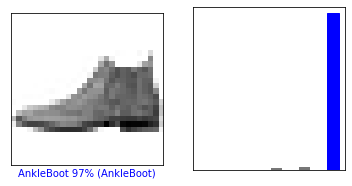

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

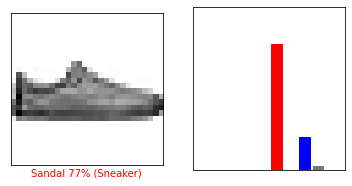

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

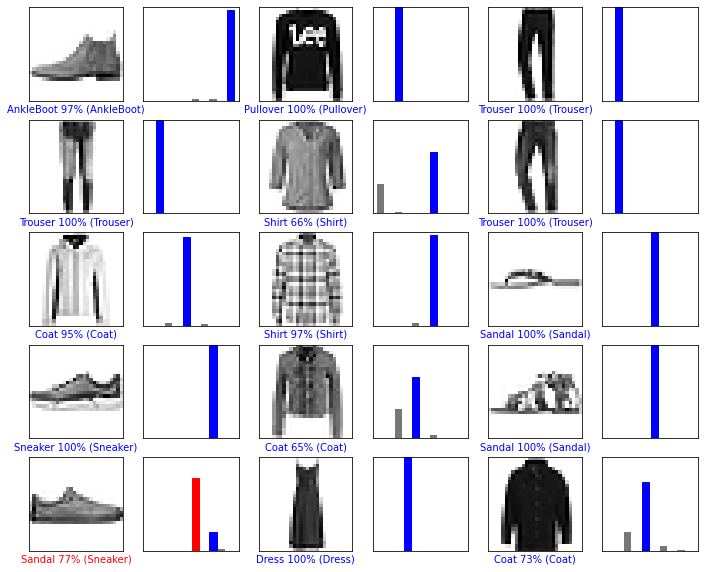

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [ ]:
img = test_images[0]

print(img.shape)

(28, 28)


In [ ]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.2141989e-05 2.5915486e-07 1.1593920e-06 5.6972539e-08 1.4288175e-07
  1.6563427e-02 1.2605495e-05 1.7861260e-02 3.7309012e-05 9.6551168e-01]]


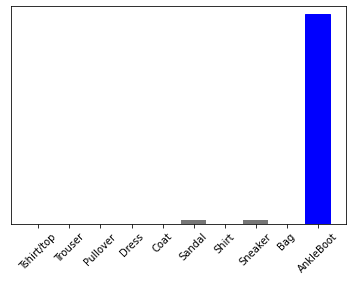

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_name, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

9